In [1]:
xn=49

In [2]:
# Enable plotting
%matplotlib inline

# Supress Warning 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time

# grabbing the upper left chip

## so far harder than I think


# select  a scene to determine the bounding box from a small date range

## June and July 1015

In [3]:
import datacube
import time

from datetime import datetime


dc = datacube.Datacube(app = 'my_app', config = '../datacube.conf')
selected_product = 'landsat_8_USARD'

date_range = (
        datetime(2015,6,1),
        datetime(2015,7,31))
dss = dc.find_datasets(product=selected_product, time=date_range, measurements=['red',])

clear_datasets = []
for item in dss:
    
    if float(item.metadata_doc['cloud_cover']) < 20.0:
        if float(item.metadata_doc['fill']) < 30.0:
            clear_datasets.append(item)
            
print("Number of Pretty Scenes", len(clear_datasets))
# for citem in clear_datasets:
  #   print(citem.uris)


Failed to resolve driver datacube.plugins.index::s3aio_index


Number of Pretty Scenes 3


In [4]:
citem = clear_datasets[0]
citem.extent

Geometry(POLYGON ((-2115585 2714805,-2115585 2864805,-1965585 2864805,-1965585 2714805,-2115585 2714805)), epsg:5072)

In [5]:
citem.bounds

l = citem.bounds.left

b = citem.bounds.bottom

r = citem.bounds.right

t = citem.bounds.top



In [6]:
from pyproj import Proj

# Create projection transformation object

p = Proj(init='epsg:5072') # EPSG code AEA



In [7]:

x1 = l + (xn * 100) * 30
x2 = l + ((xn + 1) * 100 - 1) * 30
y1 = t
y2 = t - 99 * 30



In [8]:
def load_me_xy():
    selected_product = 'landsat_8_USARD'
    measurements=['red','green','blue']
    # ## for pyccd - you need thesed 
    # measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

    ds2 = dc.load(product=selected_product, datasets=clear_datasets, measurements=measurements,
             x=(x1,x2),y=(y1,y2), crs='epsg:5072',

                output_crs = 'epsg:5072', 
              # output_crs = 'epsg:4326', 

              resolution = (-30,30))
    return (ds2)

In [9]:
t1 = time.time()
%time ul_dataset = load_me_xy()

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test
Exception during driver init, driver name: datacube.plugins.io.read::failing_end_point_throw
Failed to resolve driver datacube.plugins.io.read::bad_end_point
Driver init returned None, driver name: datacube.plugins.io.read::failing_end_point_none


TONY load output_crs=output_crs, =  epsg:5072
TONY output_geobox crs =  epsg:5072
TONY geopolygon crs =  epsg:5072
TONY geopolygon stuff =  epsg:5072 | 30.00, 0.00,-1968600.00|
| 0.00,-30.00, 2864820.00|
| 0.00, 0.00, 1.00| 100 100
TONY GeoBox extent =  Geometry({'coordinates': [[(-1968600.0, 2864820.0), (-1968600.0, 2861820.0), (-1965600.0, 2861820.0), (-1965600.0, 2864820.0), (-1968600.0, 2864820.0)]], 'type': 'Polygon'}, CRS('epsg:5072'))
TONY load type geobox =  <class 'datacube.utils.geometry.GeoBox'>
TONY load geobox =  GeoBox(Geometry({'coordinates': [[(-121.8281757549756, 46.349629366551966), (-121.81774332893893, 46.32356730566915), (-121.78030239817438, 46.33082187075377), (-121.79072121171158, 46.3568873463551), (-121.8281757549756, 46.349629366551966)]], 'type': 'Polygon'}, CRS('EPSG:4326')))
TONY load geobox.extent =  Geometry({'coordinates': [[(-1968600.0, 2864820.0), (-1968600.0, 2861820.0), (-1965600.0, 2861820.0), (-1965600.0, 2864820.0), (-1968600.0, 2864820.0)]], 'ty

TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB3.tif' mode='r'>
TONY BandDataSource reproject  epsg:5072
TONY BandDataSource reproject abc <class 'NoneType'>
TONY BandDataSource reproject dir abc ['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
TONY BandDataSource reproject print abc None
TONY (driver/readers.py) source_type <class 'datacube.storage.storage.RasterDatasetDataSource'>
TONY (driver/readers.py) band_name green
TONY (driver/readers.py) return source_type <datacube.storage.storage.RasterDatasetDataSource object at 0x7fb246435d68>
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/us

True

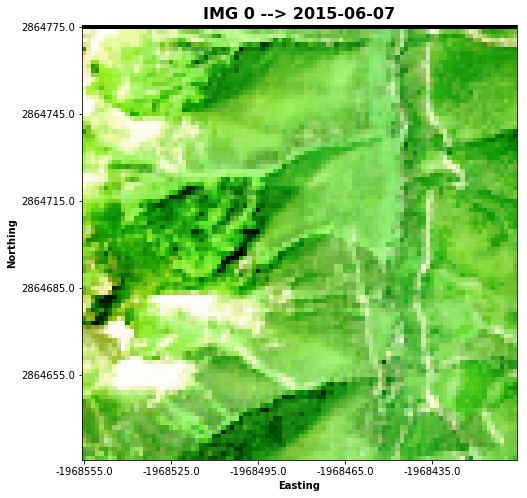

In [10]:
from noteLib import plot_labeled_rgb
ntime = len(ul_dataset.time)

t=0
cnt=0
plot_labeled_rgb(ul_dataset, t, cnt)